In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'], index_col=None)
data.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 8 columns):
Province/State    6000 non-null object
Country/Region    19500 non-null object
Lat               19500 non-null float64
Long              19500 non-null float64
Date              19500 non-null datetime64[ns]
Confirmed         19500 non-null int64
Deaths            19500 non-null int64
Recovered         19500 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [4]:
data.rename(columns={'Date': 'date', 
                     'Id': 'id',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat',
                     'Long': 'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)
data.head()

state      country      lat     long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.0000  65.0000 2020-01-22          0       0   
1   NaN      Albania  41.1533  20.1683 2020-01-22          0       0   
2   NaN      Algeria  28.0339   1.6596 2020-01-22          0       0   
3   NaN      Andorra  42.5063   1.5218 2020-01-22          0       0   
4   NaN       Angola -11.2027  17.8739 2020-01-22          0       0   

   recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [5]:
data.head()

state      country      lat     long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.0000  65.0000 2020-01-22          0       0   
1   NaN      Albania  41.1533  20.1683 2020-01-22          0       0   
2   NaN      Algeria  28.0339   1.6596 2020-01-22          0       0   
3   NaN      Andorra  42.5063   1.5218 2020-01-22          0       0   
4   NaN       Angola -11.2027  17.8739 2020-01-22          0       0   

   recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [6]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

## Worldwide 

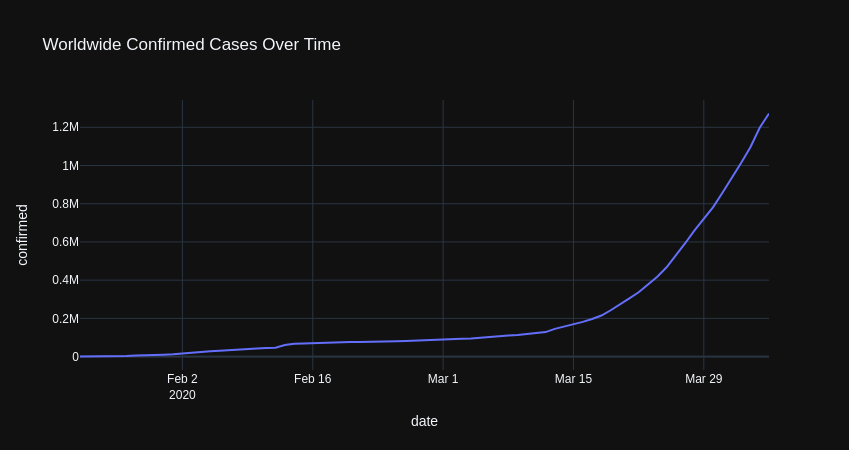

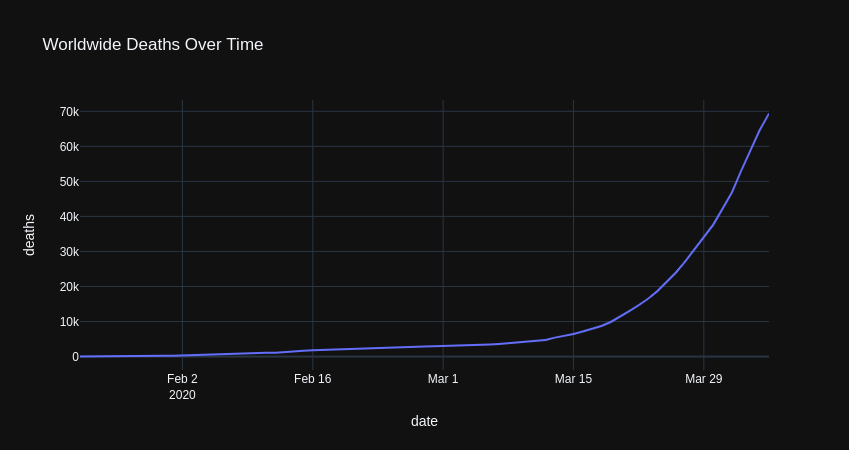

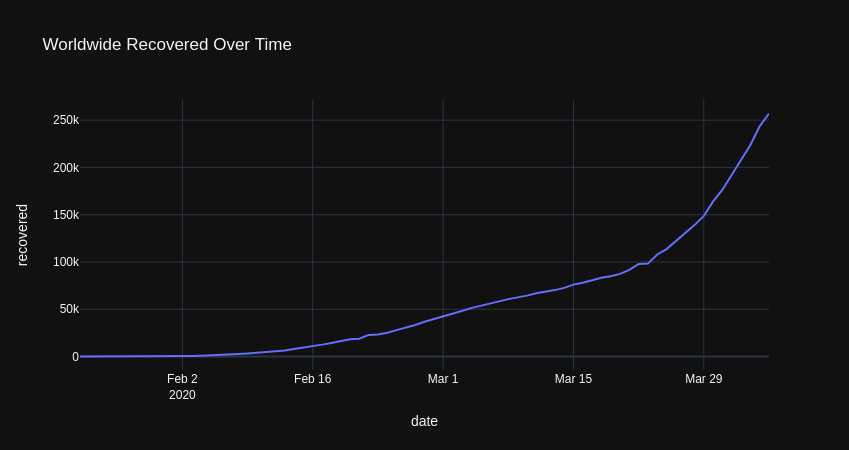

In [7]:
grouped = data.groupby('date')['confirmed','deaths','recovered'].sum().reset_index()

fig = px.line(grouped, x="date", y="confirmed", title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="date", y="deaths", title="Worldwide Deaths Over Time")
fig.show()

fig = px.line(grouped, x="date", y="recovered", title="Worldwide Recovered Over Time")
fig.show()

In [8]:
grouped_china = data[data['country'] == "China"].reset_index()
grouped_china_date = grouped_china.groupby('date')['date', 'confirmed', 'deaths', 'recovered'].sum().reset_index()

grouped_italy = data[data['country'] == "Italy"].reset_index()
grouped_italy_date = grouped_italy.groupby('date')['date', 'confirmed', 'deaths', 'recovered'].sum().reset_index()

grouped_us = data[data['country'] == "US"].reset_index()
grouped_us_date = grouped_us.groupby('date')['date', 'confirmed', 'deaths', 'recovered'].sum().reset_index()

grouped_rest = data[~data['country'].isin(['China', 'Italy', 'US'])].reset_index()
grouped_rest_date = grouped_rest.groupby('date')['date', 'confirmed', 'deaths', 'recovered'].sum().reset_index()

grouped_india = data[data['country'] == "India"].reset_index()
grouped_india_date = grouped_india.groupby('date')['date', 'confirmed', 'deaths', 'recovered'].sum().reset_index()

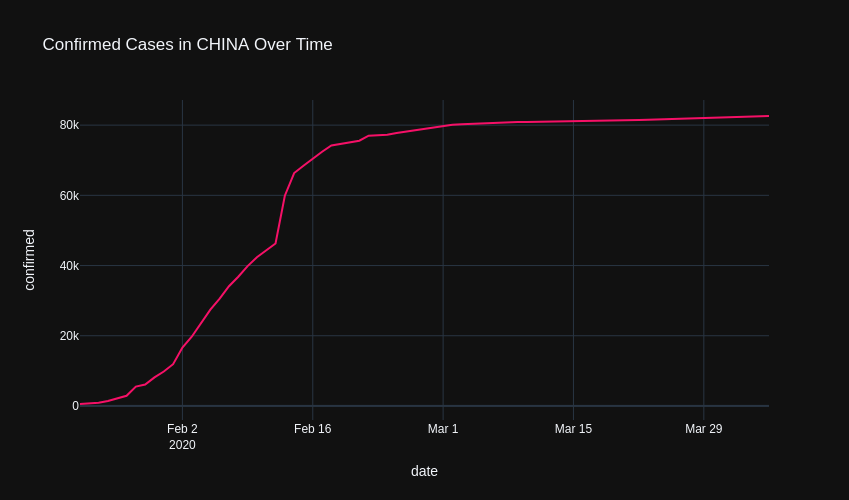

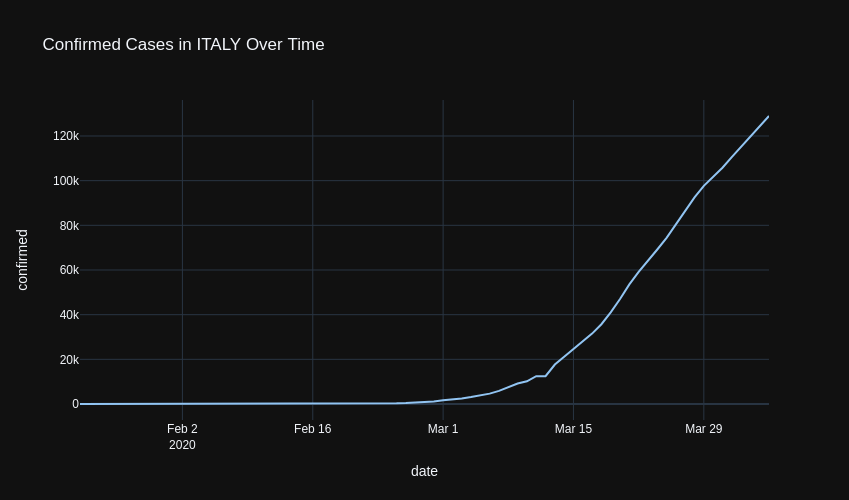

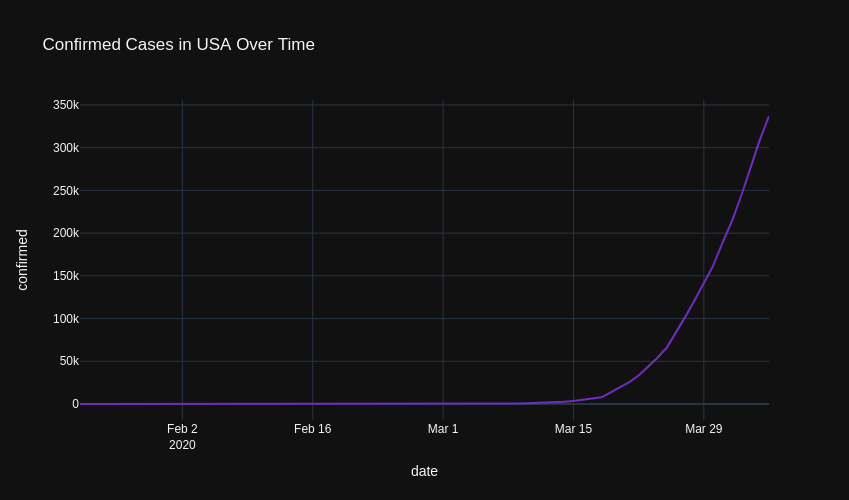

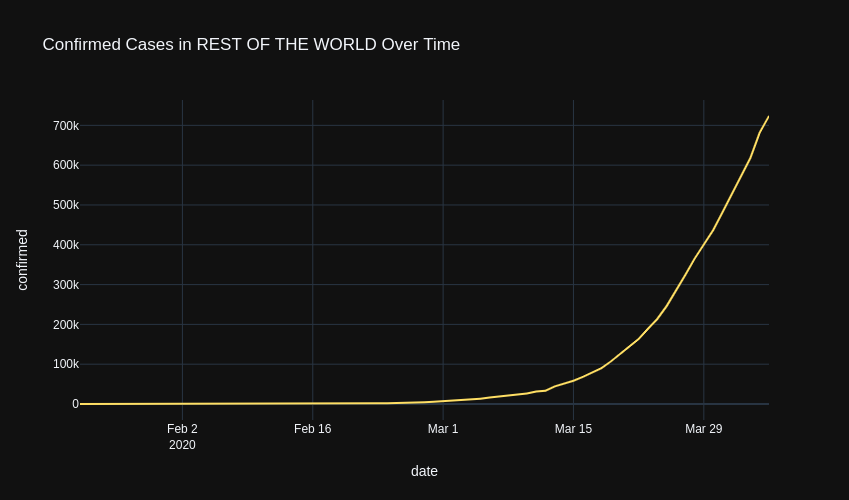

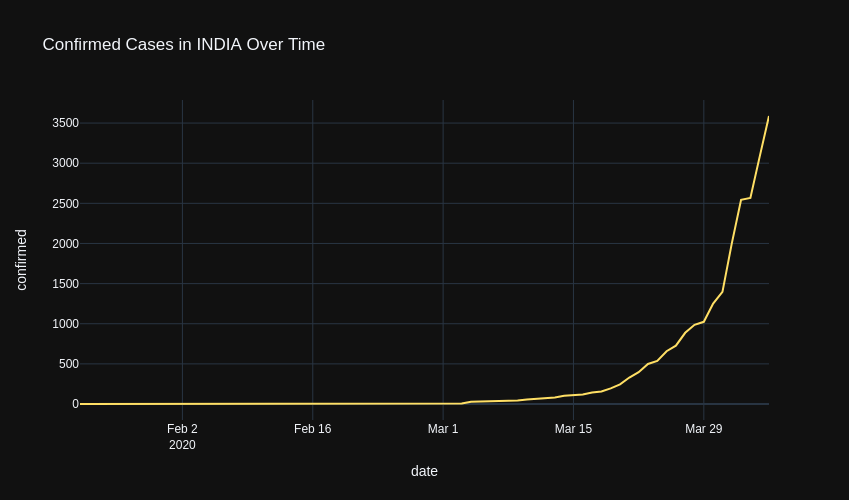

In [10]:
plot_titles = ['China', 'Italy', 'USA', 'Rest of the World', 'India']

fig = px.line(grouped_china_date, x="date", y="confirmed", 
              title=f"Confirmed Cases in {plot_titles[0].upper()} Over Time", 
              color_discrete_sequence=['#F61067'],
              height=500
             )
fig.show()

fig = px.line(grouped_italy_date, x="date", y="confirmed", 
              title=f"Confirmed Cases in {plot_titles[1].upper()} Over Time", 
              color_discrete_sequence=['#91C4F2'],
              height=500
             )
fig.show()

fig = px.line(grouped_us_date, x="date", y="confirmed", 
              title=f"Confirmed Cases in {plot_titles[2].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()

fig = px.line(grouped_rest_date, x="date", y="confirmed", 
              title=f"Confirmed Cases in {plot_titles[3].upper()} Over Time", 
              color_discrete_sequence=['#FFDF64'],
              height=500
             )
fig.show()

fig = px.line(grouped_india_date, x="date", y="confirmed", 
              title=f"Confirmed Cases in {plot_titles[4].upper()} Over Time", 
              color_discrete_sequence=['#FFDF64'],
              height=500
             )
fig.show()

/home/deeksha/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



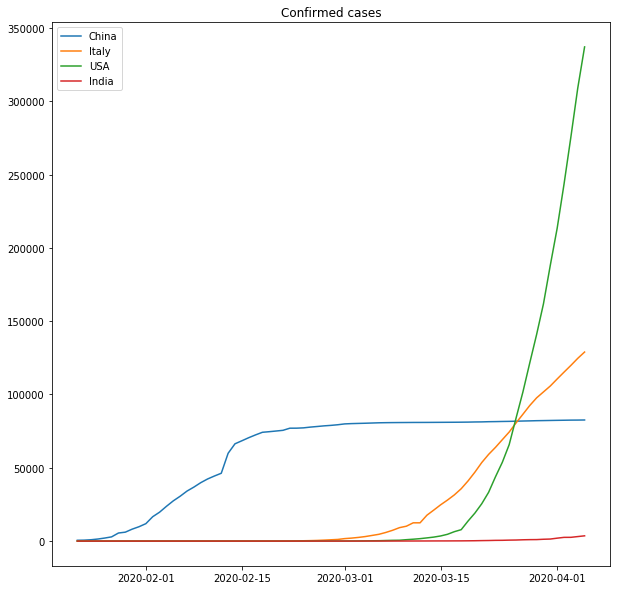

In [11]:
plt.figure(figsize=(10,10))
one = plt.plot(grouped_china_date['date'], grouped_china_date['confirmed'], label='China')
two = plt.plot(grouped_italy_date['date'], grouped_italy_date['confirmed'], label='Italy')
three = plt.plot(grouped_us_date['date'], grouped_us_date['confirmed'], label='USA')
four = plt.plot(grouped_india_date['date'], grouped_india_date['confirmed'], label='India')
plt.title('Confirmed cases')
plt.legend()
plt.show()

In [12]:
data['state'] = data['state'].fillna('')
temp = data[[col for col in data.columns if col != 'state']]

latest = temp[temp['date'] == max(temp['date'])].reset_index()
latest_grouped = latest.groupby('country')['confirmed', 'deaths', 'recovered'].sum().reset_index()

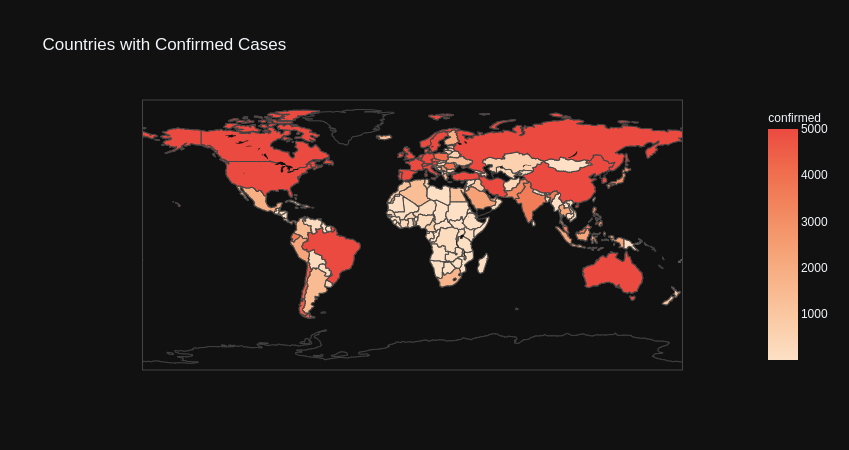

In [13]:
fig = px.choropleth(latest_grouped, locations="country", 
                    locationmode='country names', color="confirmed", 
                    hover_name="country", range_color=[1,5000], 
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

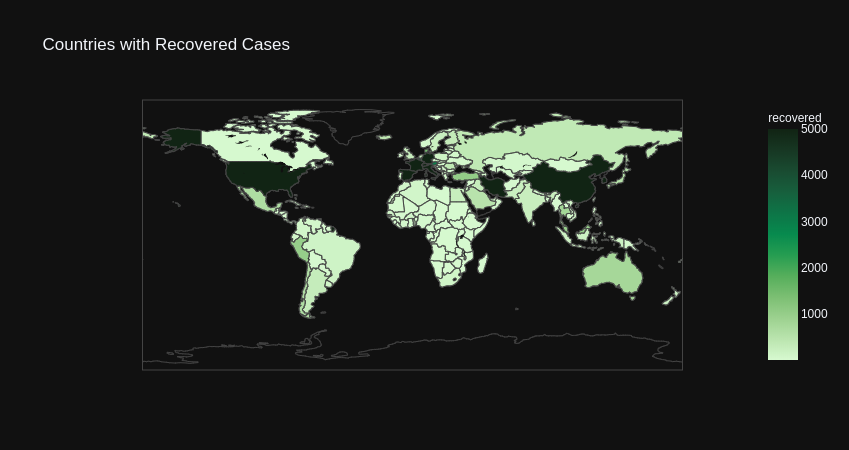

In [14]:
fig = px.choropleth(latest_grouped, locations="country", 
                    locationmode='country names', color="recovered", 
                    hover_name="country", range_color=[1,5000], 
                    color_continuous_scale="algae", 
                    title='Countries with Recovered Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

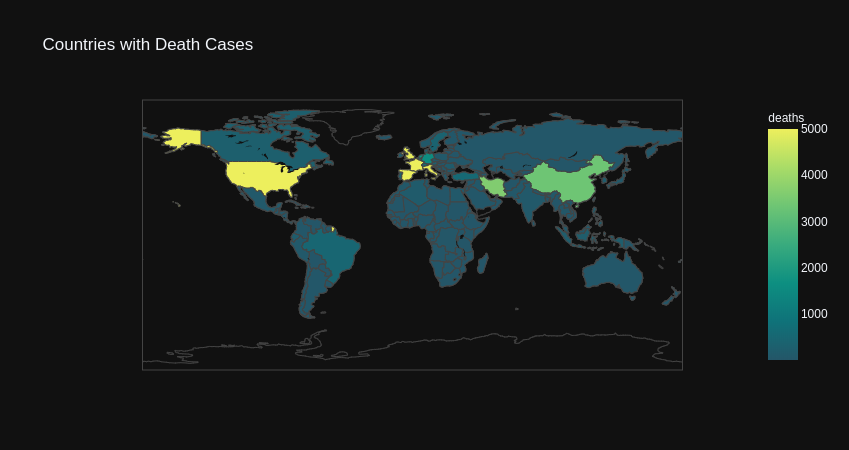

In [15]:
fig = px.choropleth(latest_grouped, locations="country", 
                    locationmode='country names', color="deaths", 
                    hover_name="country", range_color=[1,5000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Death Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [16]:
europe = list(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
               'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
               'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
               'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia'])

europe_grouped_latest = latest_grouped[latest_grouped['country'].isin(europe)]

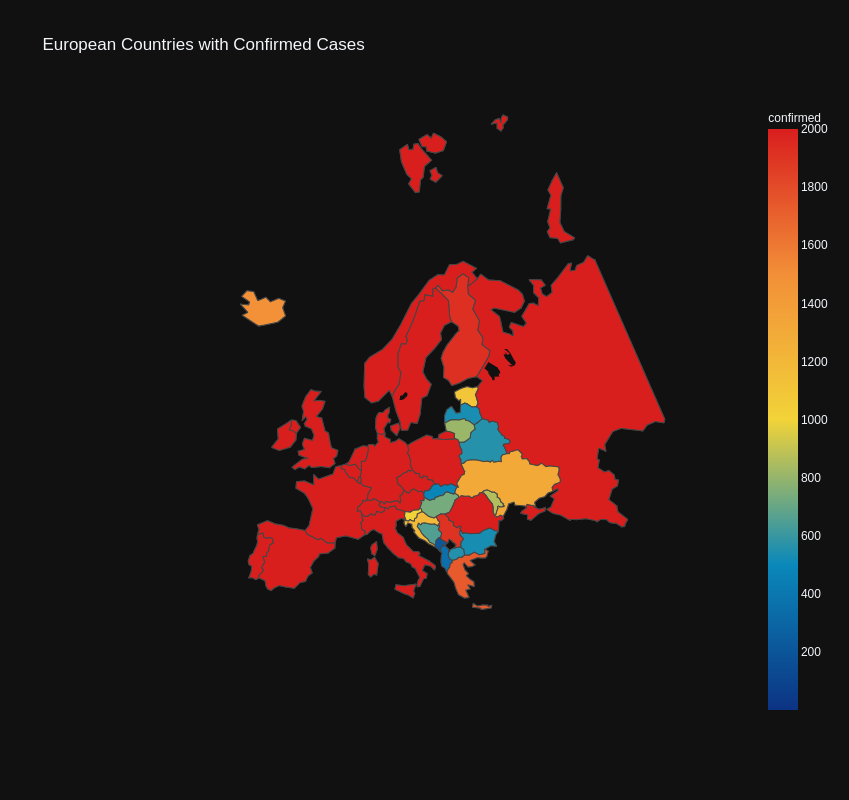

In [17]:
fig = px.choropleth(europe_grouped_latest, locations="country", 
                    locationmode='country names', color="confirmed", 
                    hover_name="country", range_color=[1,2000], 
                    color_continuous_scale='portland', 
                    title='European Countries with Confirmed Cases', scope='europe', height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()

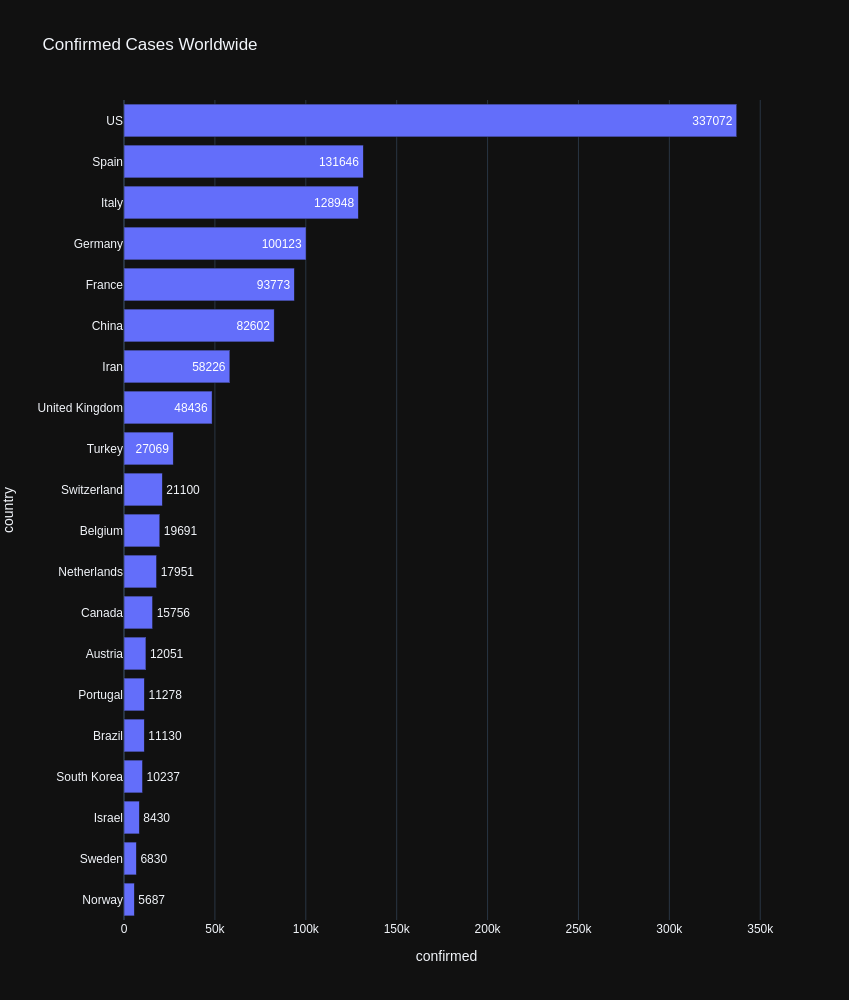

In [18]:
_ = latest_grouped.sort_values('confirmed', ascending=False)[:20][::-1]
fig = px.bar(_, x='confirmed', y='country',
             title='Confirmed Cases Worldwide', text='confirmed', height=1000, orientation='h')
fig.show()

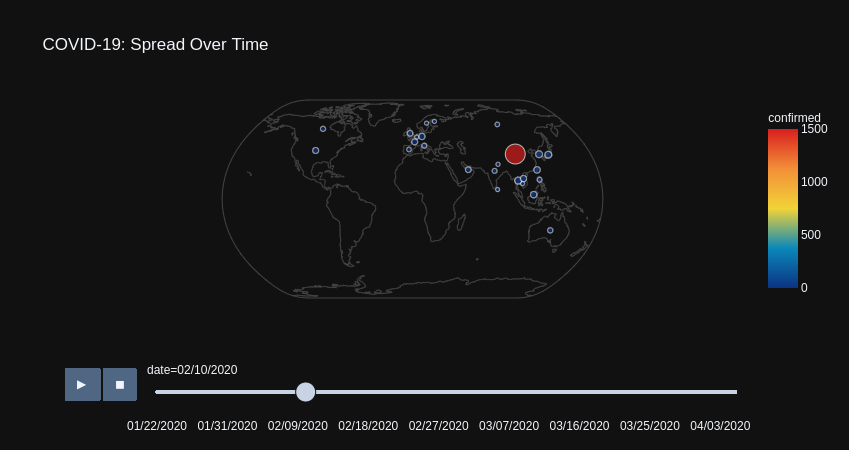

In [19]:
formated_gdf = data.groupby(['date', 'country'])['confirmed', 'deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['date'] = pd.to_datetime(formated_gdf['date'])
formated_gdf['date'] = formated_gdf['date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="country", locationmode='country names', 
                     color="confirmed", size='size', hover_name="country", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="date", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

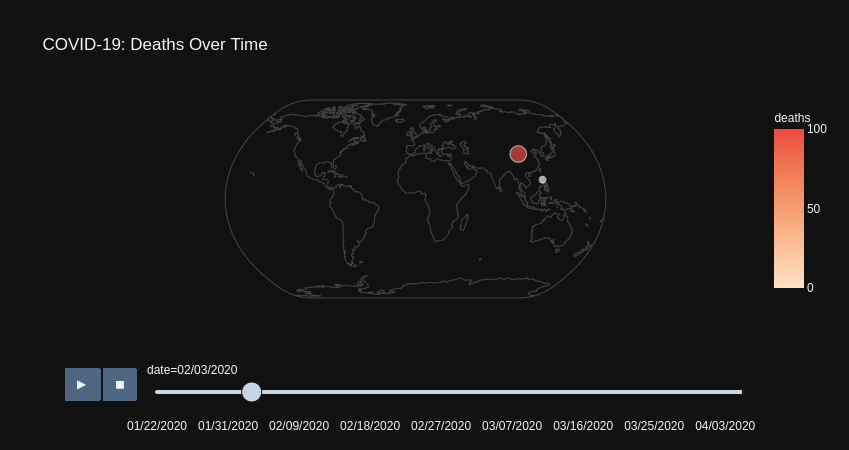

In [20]:
formated_gdf = data.groupby(['date', 'country'])['confirmed', 'deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['date'] = pd.to_datetime(formated_gdf['date'])
formated_gdf['date'] = formated_gdf['date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['deaths'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="country", locationmode='country names', 
                     color="deaths", size='size', hover_name="country", 
                     range_color= [0, 100], 
                     projection="natural earth", animation_frame="date", 
                     title='COVID-19: Deaths Over Time', color_continuous_scale="peach")
# fig.update(layout_coloraxis_showscale=False)
fig.show()